## Lorenz System

### $$\begin{align} \dot{x} &= \sigma (y - x) \\ \dot{y} &= x (\rho - z) - y \\ \dot{z} &= xy - \beta z \end{align}$$ 

In [ ]:
# Install ipympl:
!pip install ipympl

In [6]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter('ignore')

In [13]:
import numpy as np
import pandas as pd

#Plotting and Visualizations
import matplotlib.pyplot as plt
#Enable the ipympl backend in your notebook
%matplotlib widget
#%matplotlib inline


import seaborn as sns
sns.set()

import sympy as sp
#from IPython.display import display, Math, HTML
from matplotlib.animation import FuncAnimation, PillowWriter

In [14]:
import platform
print(f"Python version: {platform.python_version()}")
print(f"numpy version: {np.__version__}")
print(f"panda version: {pd.__version__}")
print(f"seaborn version: {sns.__version__}")
import matplotlib
print(f"matplotlib version: {matplotlib.__version__}")

print(f"SymPy version: {sp.__version__}")
import scipy
print(f"scipy version: {scipy.__version__}")

Python version: 3.10.14
numpy version: 1.26.4
panda version: 2.2.1
seaborn version: 0.13.2
matplotlib version: 3.7.5
SymPy version: 1.12
scipy version: 1.14.1


## Solve these equations numerically using scipy.integrate.solve_ivp

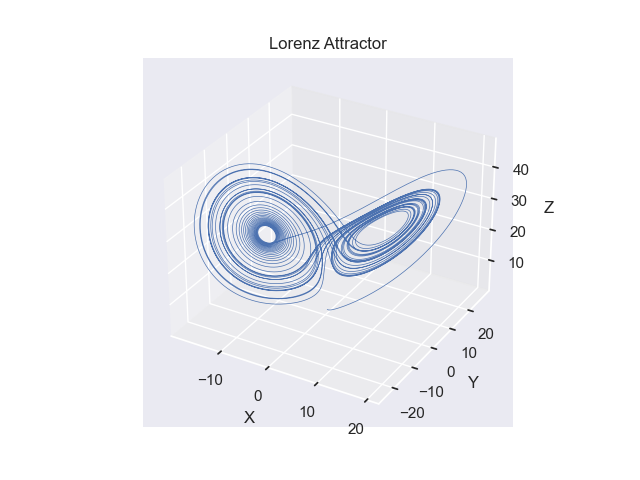

In [18]:
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D

# Define the Lorenz system for numerical integration
def lorenz_system(t, state, sigma, rho, beta):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Parameters and initial conditions
sigma = 10.0
rho = 28.0
beta = 8.0 / 3.0
initial_state = [0.0, 1.0, 1.05]
t_span = (0, 40)
t_eval = np.linspace(0, 40, 10000)

# Solve the system numerically
sol = solve_ivp(lorenz_system, t_span, initial_state, args=(sigma, rho, beta), t_eval=t_eval)

# Plot the solution
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(sol.y[0], sol.y[1], sol.y[2], lw=0.5, color='b')
ax.set_title("Lorenz Attractor")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()


In [16]:
#plt.close(fig)


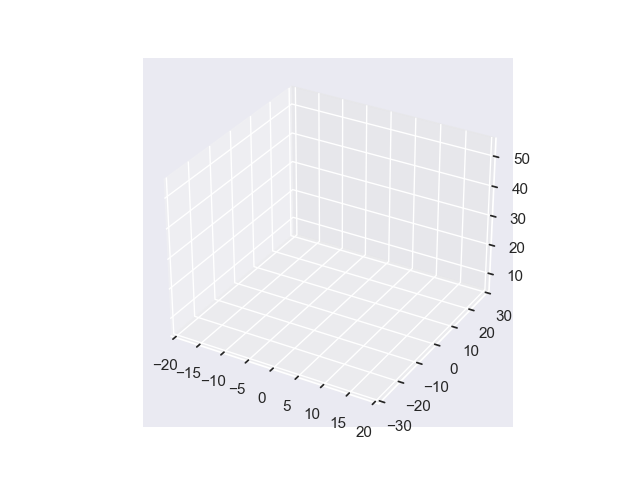

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp

# Lorenz system parameters
sigma = 10.0
rho = 28.0
beta = 8.0 / 3.0

# Lorenz system equations
def lorenz(t, state):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Initial conditions and time span
initial_state = [1.0, 1.0, 1.0]
t_span = (0, 40)
t_eval = np.linspace(t_span[0], t_span[1], 5000)

# Solve the Lorenz system
solution = solve_ivp(lorenz, t_span, initial_state, t_eval=t_eval)
x, y, z = solution.y

# Set up the figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-20, 20)
ax.set_ylim(-30, 30)
ax.set_zlim(5, 55)

# Initialize the line that will represent the trajectory
line, = ax.plot([], [], [], lw=0.5, color='b')
point, = ax.plot([], [], [], 'ro')  # Red point for the current position

# Initialization function
def init():
    line.set_data([], [])
    line.set_3d_properties([])
    point.set_data([], [])
    point.set_3d_properties([])
    return line, point

# Animation function
def update(num):
    # Update the line and the point
    line.set_data(x[:num], y[:num])
    line.set_3d_properties(z[:num])
    point.set_data(x[num], y[num])
    point.set_3d_properties(z[num])
    return line, point

# Create the animation
ani = FuncAnimation(fig, update, frames=len(t_eval), init_func=init, blit=True)

# Display the animation
plt.show()

# Display the animation
#plt.close(fig)  # Close static figure to prevent duplicate display
#HTML(ani.to_jshtml())

# If you want to save the animation as a gif, uncomment the following line:
#ani.save('Lorenz system.gif', writer='pillow', fps=5)